In [ ]:
import torch
from gan import GeneratorNet
from gan import make_grid
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
class MyCNN(nn.Module):
    '''
    Custom CNN model for CAPTCHA character recognition.
    '''
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 16, 3, padding=2)
        self.fc1   = nn.Linear(16 * 7 * 7, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 36)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 16 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = MyCNN()
model.load_state_dict(torch.load('model_state_dict.pt'))

<All keys matched successfully>

In [3]:
gen = GeneratorNet()
i = 1000
gen.load_state_dict(torch.load(f'checkpoints/ckpt_{i}.pth'))

<All keys matched successfully>

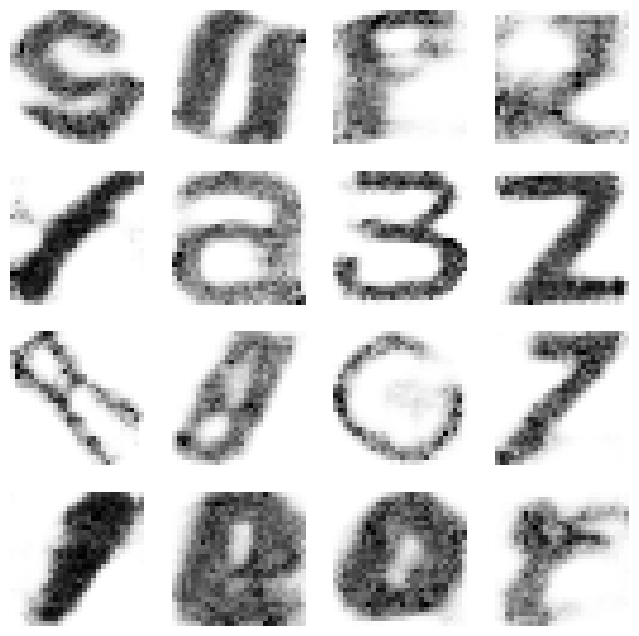

In [4]:
num_ims = 16
noise = torch.randn(num_ims, 128)
gen.eval()
with torch.no_grad():
    images = gen(noise)
fig = make_grid(images)

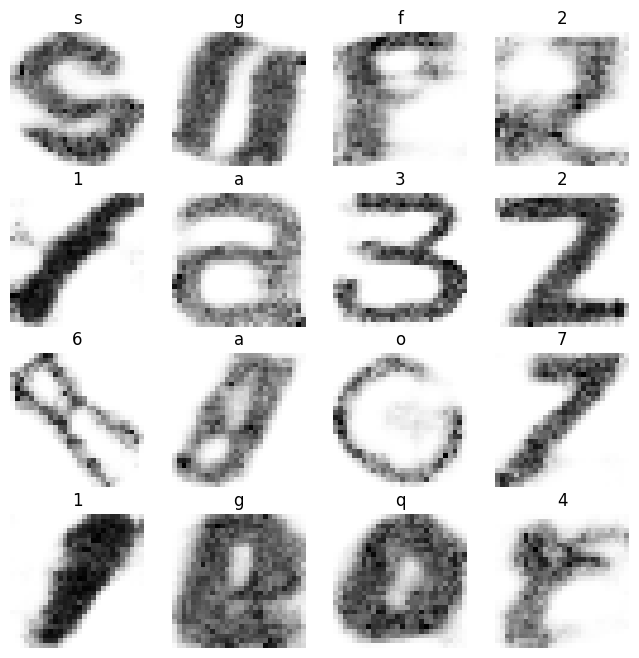

In [5]:
idx2char = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '0', 27: '1', 28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9'}

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
count = 0
for y in range(4):
    for x in range(4):
        img = images[count].view(28, 28)
        pred = model(img.unsqueeze(0))
        pred = torch.argmax(pred, dim=1).item()
        pred = idx2char[pred]
        axs[y][x].imshow(img, cmap="gray")
        axs[y][x].set_title(pred)
        axs[y][x].axis('off')
        count += 1